In [0]:
#https://www.kaggle.com/tmdb/tmdb-movie-metadata
import pandas as pd
import numpy as np
credits = pd.read_csv('/content/drive/My Drive/tmdb-movie-metadata/tmdb_5000_credits.csv')
movies = pd.read_csv('/content/drive/My Drive/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [0]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [0]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [0]:
credits.rename(index = str , columns={'movie_id' : 'id'} ,inplace = True)
credits.head()

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [0]:
data = credits.merge(movies,on = 'id')
data.head()

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
id                      4803 non-null int64
title_x                 4803 non-null object
cast                    4803 non-null object
crew                    4803 non-null object
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null o

In [0]:
data_cleaned = data[['id','original_title','popularity','vote_average','vote_count']]
data_cleaned.head()

,id,original_title,popularity,vote_average,vote_count
0,19995,Avatar,150.437577,7.2,11800
1,285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500
2,206647,Spectre,107.376788,6.3,4466
3,49026,The Dark Knight Rises,112.312950,7.6,9106
4,49529,John Carter,43.926995,6.1,2124


**Using Weighted average for each movie's Average Rating**

![alt text](http://trailerpark.weebly.com/uploads/8/8/5/5/8855465/7628808.png?371)

In [0]:
v=data_cleaned['vote_count']
R=data_cleaned['vote_average']
C=data_cleaned['vote_average'].mean()
m=data_cleaned['vote_count'].quantile(0.70)

In [0]:
data_cleaned['weighted_average']=((R*v)+ (C*m))/(v+m)

In [0]:
data_cleaned.head()

,id,original_title,popularity,vote_average,vote_count,weighted_average
0,19995,Avatar,150.437577,7.2,11800,7.148013
1,285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,6.807627
2,206647,Spectre,107.376788,6.3,4466,6.276075
3,49026,The Dark Knight Rises,112.312950,7.6,9106,7.509565
4,49529,John Carter,43.926995,6.1,2124,6.098319


In [0]:
data_cleaned.sort_values('vote_average',ascending= False).head(10)

,id,original_title,popularity,vote_average,vote_count,weighted_average
3519,89861,Stiff Upper Lips,0.356495,10.0,1,6.098886
4247,361505,Me You and Five Bucks,0.094105,10.0,2,6.105577
4045,78373,"Dancer, Texas Pop. 81",0.376662,10.0,1,6.098886
4662,40963,Little Big Top,0.092100,10.0,1,6.098886
3992,346081,Sardaarji,0.296981,9.5,2,6.103862
2386,69848,One Man's Hero,0.910529,9.3,2,6.103176
2970,88641,There Goes My Baby,0.037073,8.5,2,6.100432
1881,278,The Shawshank Redemption,136.747729,8.5,8205,8.340775
2796,43867,The Prisoner of Zenda,4.021389,8.4,11,6.135054
3337,238,The Godfather,143.659698,8.4,5893,8.192887


In [0]:
data_cleaned.sort_values(by = 'weighted_average',ascending= False).head(10)

,id,original_title,popularity,vote_average,vote_count,weighted_average
1881,278,The Shawshank Redemption,136.747729,8.5,8205,8.340775
3337,238,The Godfather,143.659698,8.4,5893,8.192887
662,550,Fight Club,146.757391,8.3,9413,8.171648
3232,680,Pulp Fiction,121.463076,8.3,8428,8.157615
65,155,The Dark Knight,187.322927,8.2,12002,8.102674
809,13,Forrest Gump,138.133331,8.2,7927,8.056059
1818,424,Schindler's List,104.469351,8.3,4329,8.038748
3865,244786,Whiplash,192.528841,8.3,4254,8.034695
96,27205,Inception,167.583710,8.1,13752,8.018611
1990,1891,The Empire Strikes Back,78.517830,8.2,5879,8.010426


Text(0, 0.5, 'Movie Title')

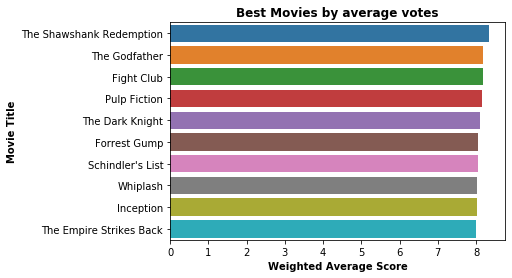

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.barplot(data = data_cleaned.sort_values(by = 'weighted_average',ascending= False).head(10),y = 'original_title',x = 'weighted_average')
plt.title('Best Movies by average votes')
plt.xlabel('Weighted Average Score')
plt.ylabel('Movie Title')

Text(0, 0.5, 'Movie Title')

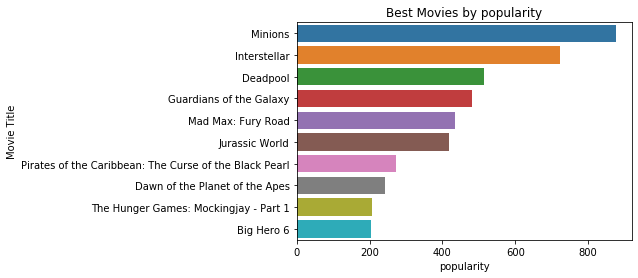

In [0]:
sns.barplot(data = data_cleaned.sort_values(by = 'popularity',ascending= False).head(10),y = 'original_title',x = 'popularity')
plt.title('Best Movies by popularity')
plt.xlabel('popularity')
plt.ylabel('Movie Title')

**Recommendation based on scaled weighted average and popularity score(Priority is given 50% to both)**

In [0]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scaled_data = scale.fit_transform(data_cleaned[['popularity','weighted_average']])
scaled_data = pd.DataFrame(scaled_data)

In [0]:
data_cleaned[['normalized_popularity','normalized_weight_average']] = scaled_data

In [0]:
data_cleaned.head()

,id,original_title,popularity,vote_average,vote_count,weighted_average,normalized_popularity,normalized_weight_average
0,19995,Avatar,150.437577,7.2,11800,7.148013,0.171815,0.674339
1,285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,6.807627,0.158846,0.581403
2,206647,Spectre,107.376788,6.3,4466,6.276075,0.122635,0.436273
3,49026,The Dark Knight Rises,112.312950,7.6,9106,7.509565,0.128272,0.773054
4,49529,John Carter,43.926995,6.1,2124,6.098319,0.050169,0.387739


In [0]:
data_cleaned['score'] = data_cleaned['normalized_popularity'] * 0.5 + data_cleaned['normalized_weight_average'] * 0.5 

Text(0, 0.5, 'Movie Title')

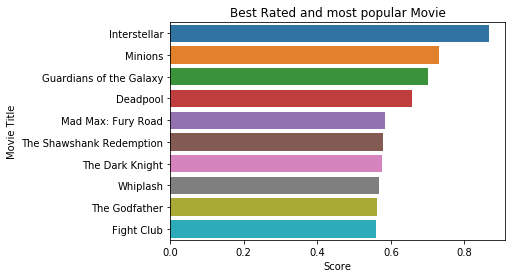

In [0]:
sns.barplot(data = data_cleaned.sort_values('score',ascending= False).head(10) , y = 'original_title', x = 'score')
plt.title('Best Rated and most popular Movie')
plt.xlabel('Score')
plt.ylabel('Movie Title')